# 画像データの確認

In [1]:
# ライブラリのインポート
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from PIL import Image
import cv2

In [2]:
# train(NORMAL)内の画像リスト作成
normal_list = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/*.jpeg')
pneumonia_list = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg')
#print(normal_list)
#print(pneumonia_list)

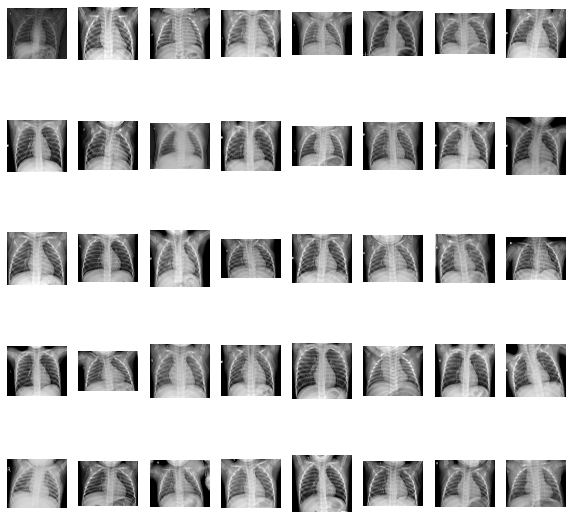

In [3]:
# Normal画像の表示
plt.figure(figsize=(10, 10))
for i in range(40):
    path = normal_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    plt.imshow(img_array)

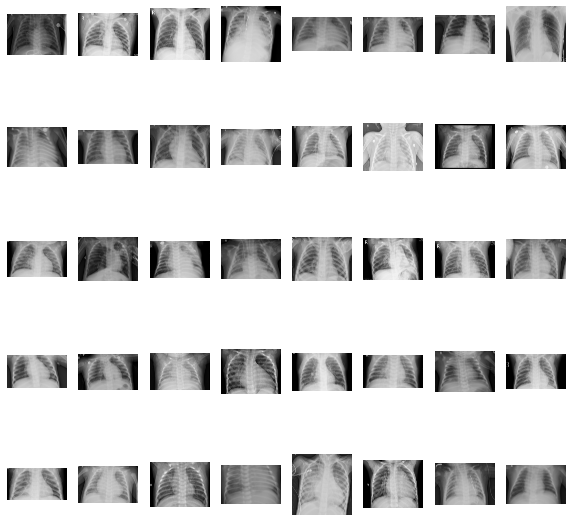

In [4]:
# Pneumonia画像の表示
plt.figure(figsize=(10, 10))
for i in range(40):
    path = pneumonia_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    plt.imshow(img_array)

# 画像の切り取り（縦、横を10%削除）

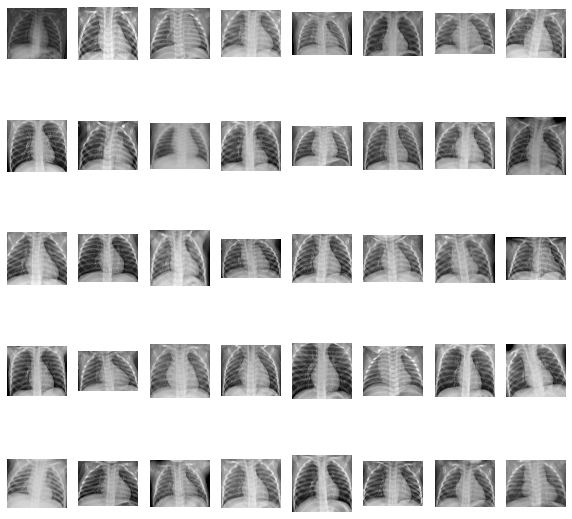

In [5]:
# Normal画像の表示
# 画像周辺を10%切り取り
plt.figure(figsize=(10, 10))
for i in range(40):
    path = normal_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = Image.open(path).convert('RGB')
    w, h = img.size
    w1 = 0.1 * w
    h1 = 0.1 * h
    img_crop = img.crop((w1, h1, w-w1, h-h1)) # (left, upper, right, lower)
    img_array = np.array(img_crop)
    plt.imshow(img_array)

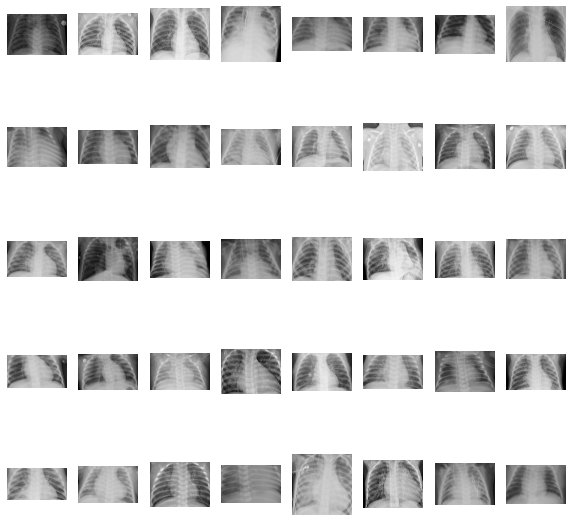

In [6]:
# Pneumonia_list画像の表示
# 画像周辺を10%切り取り
plt.figure(figsize=(10, 10))
for i in range(40):
    path = pneumonia_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = Image.open(path).convert('RGB')
    w, h = img.size
    w1 = 0.1 * w
    h1 = 0.1 * h
    img_crop = img.crop((w1, h1, w-w1, h-h1)) # (left, upper, right, lower)
    img_array = np.array(img_crop)
    plt.imshow(img_array)

# 画像の切り取り（横を10%削除）

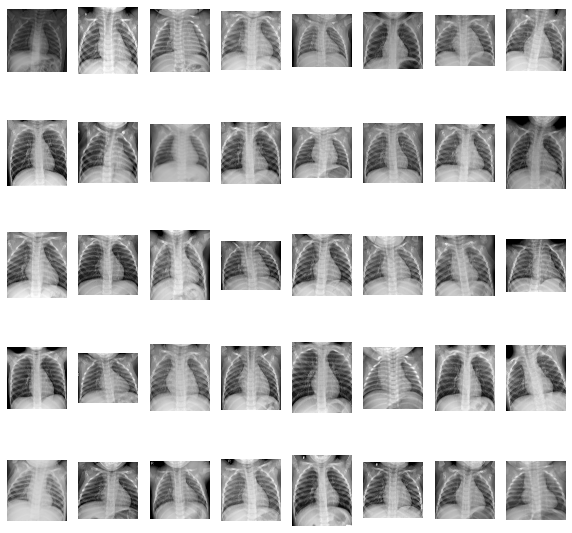

In [7]:
# Normal画像の表示
# 画像横を10%切り取り
plt.figure(figsize=(10, 10))
for i in range(40):
    path = normal_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = Image.open(path).convert('RGB')
    w, h = img.size
    w1 = 0.1 * w
    h1 = 0.1 * h
    img_crop = img.crop((w1, 0, w-w1, h)) # (left, upper, right, lower)
    img_array = np.array(img_crop)
    plt.imshow(img_array)

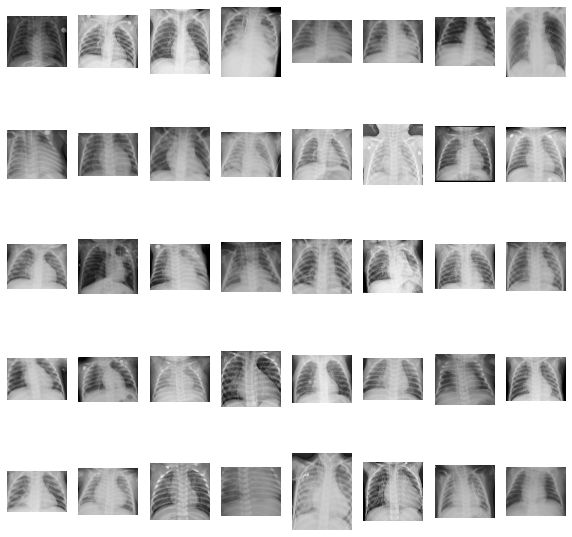

In [8]:
# Pneumonia_list画像の表示
# 画像横を10%切り取り
plt.figure(figsize=(10, 10))
for i in range(40):
    path = pneumonia_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = Image.open(path).convert('RGB')
    w, h = img.size
    w1 = 0.1 * w
    h1 = 0.1 * h
    img_crop = img.crop((w1, 0, w-w1, h)) # (left, upper, right, lower)
    img_array = np.array(img_crop)
    plt.imshow(img_array)

# EDA by OpenCV

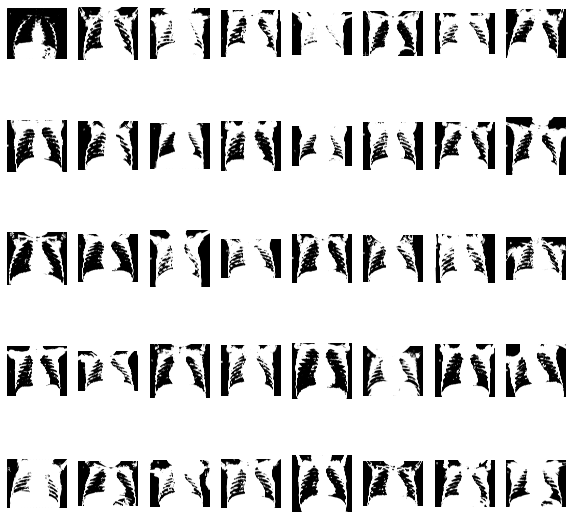

In [9]:
# Normal画像の表示
plt.figure(figsize=(10, 10))
for i in range(40):
    path = normal_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
    ret,th = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 大津の二値化
    plt.imshow(th, cmap='gray')

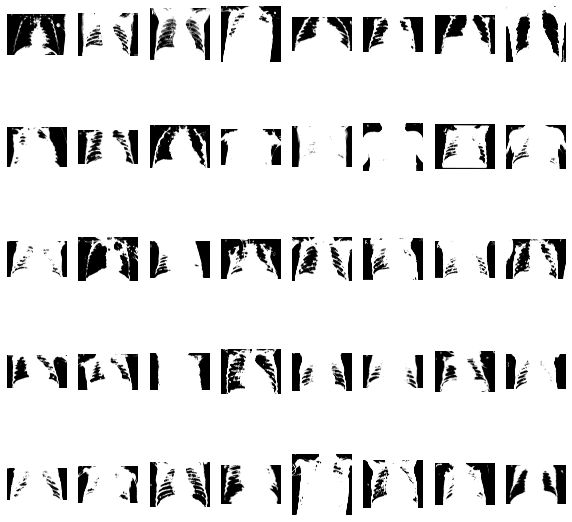

In [10]:
# Pneumonia_list画像の表示
plt.figure(figsize=(10, 10))
for i in range(40):
    path = pneumonia_list[i]
    plt.subplot(5, 8, i+1)
    plt.axis('off')
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
    ret,th = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 大津の二値化
    plt.imshow(th, cmap='gray')

二値化した場合、肺炎患者のほうが白色の面積部分が多い

In [11]:
# Normalの白色部割合の算出
normal_white_ratios = []
for path in normal_list:
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
    ret,th = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 大津の二値化
    whole_area = th.size
    white_area = cv2.countNonZero(th)
    white_ratio = white_area / whole_area
    normal_white_ratios.append(white_ratio)

In [12]:
# Pneumoniaの白色部割合の算出
pneumonia_white_ratios = []
for path in pneumonia_list:
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
    ret,th = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 大津の二値化
    whole_area = th.size
    white_area = cv2.countNonZero(th)
    white_ratio = white_area / whole_area
    pneumonia_white_ratios.append(white_ratio)

In [13]:
print('Normalの白色割合の平均値：', np.mean(normal_white_ratios))
print('Normalの白色割合の中央値：', np.median(normal_white_ratios))

print('Pneumoniaの白色割合の平均値：', np.mean(pneumonia_white_ratios))
print('Pneumoniaの白色割合の中央値：', np.median(pneumonia_white_ratios))

Normalの白色割合の平均値： 0.6136239307381338
Normalの白色割合の中央値： 0.6105784013800436
Pneumoniaの白色割合の平均値： 0.6379482720004224
Pneumoniaの白色割合の中央値： 0.6437543162983426


In [14]:
# データフレーム化
normal_white_df = pd.DataFrame({'white_ratio': normal_white_ratios})
normal_white_df['label'] = 'Normal'

pneumonia_white_df = pd.DataFrame({'white_ratio': pneumonia_white_ratios})
pneumonia_white_df['label'] = 'Pneumonia'

white_df = pd.concat([normal_white_df, pneumonia_white_df])

#print(normal_white_df)
#print(pneumonia_white_df)

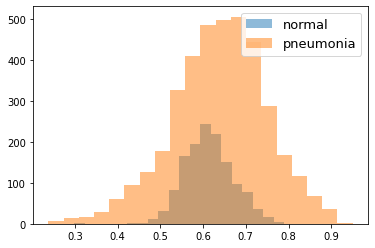

In [15]:
# 白色面積割合の可視化
plt.hist(normal_white_df['white_ratio'], alpha=0.5, bins=20, label='normal')
plt.hist(pneumonia_white_df['white_ratio'], alpha=0.5, bins=20, label='pneumonia')
plt.legend(loc="upper right", fontsize=13)
plt.show()

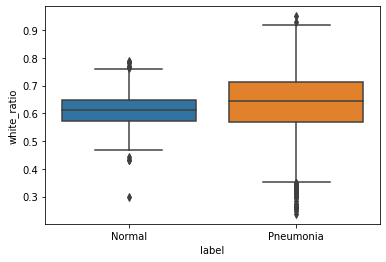

t値： -10.32
p-value： 1.07e-24


In [16]:
# 箱ひげ図
sns.boxplot(x='label', y='white_ratio', data=white_df)
plt.show()

# 対応のないt検定
t, p = stats.ttest_ind(normal_white_ratios, pneumonia_white_ratios, equal_var = False)
print('t値：', f'{t:.2f}')
print('p-value：', f'{p:.2e}')